# Final Report

## 1. Variable Analysis

### (1) Outcome Analysis

#### UBS Stock Return 
* **Why:**  We choose stock returns over stock prices because returns are often stationary and suitable for models like ARIMA, GARCH, or machine learning algorithms, while stock prices are typically non-stationary and require transformations for effective modeling.
* **Where:** Get from UBS historical stock price CSV file.   
* **How:** Calculate log returns.
* **Code** `data_prepared/load.py`  --- `load_stock_return(ticker="UBS")`

In [2]:
from data_prepared.load import load_stock_return
UBS_stock_return=load_stock_return("UBS")
UBS_stock_return.head(5)

,Date,UBS log_return
1,2021-01-05,0.022146
2,2021-01-06,0.032989
3,2021-01-07,0.028723
4,2021-01-08,-0.016218
5,2021-01-11,-0.003932


### (2) Predictor Analysis

#### A. Bid-Ask Spread 
* **Why:** Measures liquidity by indicating the difference between buying and selling prices.  
* **Where:** Calculate estimated spread from historical high and low prices in the UBS stock price CSV file.  
* **How:** Use the Corwin and Schultz estimator in Python by calculating α, β, and γ based on the high and low prices in UBS Finance data.
* **Code** `data_prepared/load.py`  --- `load_bid_ask_spread(file_path="data/UBS.csv")`

In [3]:
from data_prepared.load import load_bid_ask_spread
UBS_bid_ask_spread_df=load_bid_ask_spread(file_path="data/UBS.csv")
UBS_bid_ask_spread_df.head(5)

,Date,Bid-Ask Spread
0,2021-01-04,NaN
1,2021-01-05,0.386902
2,2021-01-06,0.803480
3,2021-01-07,0.844275
4,2021-01-08,0.106417


#### B. Trading Volume 
* **Why:** Reflects the total volume of shares traded, indicating market interest and liquidity. 
* **Where:** Get from UBS historical stock price CSV file.  
* **Code** `data_prepared/load.py`  --- `trading_volume(file_path="data/UBS.csv")`

In [4]:
from data_prepared.load import trading_volume
UBS_trading_volume_df=trading_volume(file_path="data/UBS.csv")
UBS_trading_volume_df.head(5)

,Date,volume
0,2021-01-04,4974100
1,2021-01-05,3584400
2,2021-01-06,5241300
3,2021-01-07,4618000
4,2021-01-08,2133900


#### C. SPY500
* **Why:**  explain why use return but not price; explain why choose this as predictor
* **Where:** how to get the data
* **How:**  how to calculate
* **Code** `data_prepared/load.py`  --- `what function?`

#### D. FTSE 100 index
* **Why:**  explain why use return but not price; explain why choose this as predictor
* **Where:** how to get the data
* **How:**  how to calculate
* **Code** `data_prepared/load.py`  --- `what function?`

#### E. CBOE Volatility Index (^VIX)
* **Why:**  explain why use return but not price; explain why choose this as predictor
* **Where:** how to get the data
* **How:**  how to calculate
* **Code** `data_prepared/load.py`  --- `what function?`

#### F. EUR/CHF
* **Why:**  explain why use return but not price; explain why choose this as predictor
* **Where:** how to get the data
* **How:**  how to calculate
* **Code** `data_prepared/load.py`  --- `what function?`

#### H. Oil Prices
* **Why:**  explain why use return but not price; explain why choose this as predictor
* **Where:** how to get the data
* **How:**  how to calculate
* **Code** `data_prepared/load.py`  --- `what function?`

#### I. Gold Prices
* **Why:**  explain why use return but not price; explain why choose this as predictor
* **Where:** how to get the data
* **How:**  how to calculate
* **Code** `data_prepared/load.py`  --- `what function?`

#### J.
* **Why:**  explain why use return but not price; explain why choose this as predictor
* **Where:** how to get the data
* **How:**  how to calculate
* **Code** `data_prepared/load.py`  --- `what function?`

#### K.
* **Why:**  explain why use return but not price; explain why choose this as predictor
* **Where:** how to get the data
* **How:**  how to calculate
* **Code** `data_prepared/load.py`  --- `what function?`

## 2. Model Prepared

defining time period(T), using training dataset(R) to construct models, and using testing datasets(P) to evaluate models.  
T=2021-01-04 ~2024-01-05  
R=2021-01-04 ~2023-01-02  
P= 2023-01-02~2024-01-05  


In [3]:
import pandas as pd
training_dataset=pd.read_csv("data_prepared/training_dataset.csv")
testing_dataset=pd.read_csv("data_prepared/testing_dataset.csv")
training_dataset.head(5)
testing_dataset.head(5)

,Date,UBS log_return,Bid-Ask Spread,volume,VIX,EURCHF,oil_log_return,gold_log_return,DB log_return,MS log_return,SPY log_return,^FTSE log_return
0,2023-01-04,0.037779,0.755705,2567800,-0.039640,0.000426,-0.054631,0.007096,0.063684,0.010791,0.007691,0.004109
1,2023-01-05,-0.006624,0.756940,1910000,0.020239,-0.001247,0.011330,-0.009763,-0.027622,-0.008460,-0.011479,0.006347
2,2023-01-06,0.016730,2.557751,2614200,-0.061042,-0.001126,0.001356,0.015896,0.024411,0.018908,0.022673,0.008609
3,2023-01-09,0.005015,1.437562,2929800,0.038984,0.002799,0.011590,0.004549,0.000000,0.000913,-0.000567,0.003293
4,2023-01-10,0.012429,0.276420,1786900,-0.065358,0.000840,0.006544,-0.000588,0.015158,0.014500,0.006988,-0.003943


## 3. Model Building

### 3.1 ARIMA(p,d,q) model

### 3.2 Bayesian Model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, beta, sigma]


Output()

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 35 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


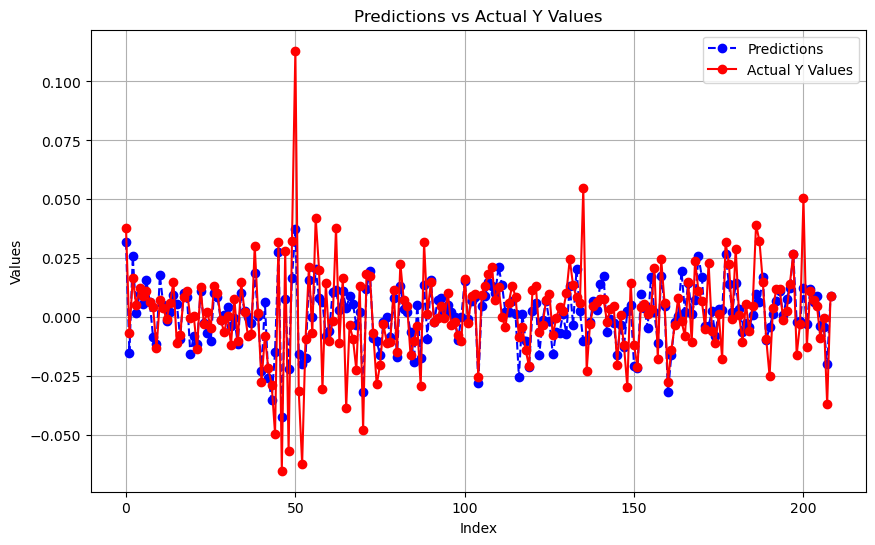

Mean Squared Forecast Error: 0.000181
Bayesian Model MSFE:  0.00018091068219435952


In [4]:
from model.bayesian import bayesian_model
from model.lib import plot_predictions_vs_actual, msfe

bay_predictions_df = bayesian_model(training_dataset, testing_dataset)

#plot
plot_predictions_vs_actual(bay_predictions_df, testing_dataset)

#MSFE
bay_msfe=msfe(bay_predictions_df, testing_dataset)
print("Bayesian Model MSFE: ", bay_msfe)

### 3.3 Decision Tree

### 3.4 Gradient Boosting Machines (GBM)

### 3.5 Neural Networks 

## 4. Forecast accuracy measures